In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

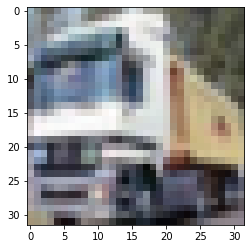

In [4]:
plt.imshow(x_train[1])

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

In [10]:
def plot_sample(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

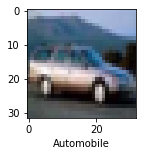

In [11]:
plot_sample(x_train,y_train,4)

In [12]:
x_train = x_train/255.0
x_test = x_test/255.0

In [17]:
#ANN
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
    
])
ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy']
            )
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.8135 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 104s 66ms/step - loss: 1.6238 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5425 - accuracy: 0.4547
Epoch 4/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.4842 - accuracy: 0.4760
Epoch 5/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.4315 - accuracy: 0.4958


In [18]:
x_train.shape

(50000, 32, 32, 3)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [21]:
print("Classification report \n",classification_report(y_test,y_pred_classes))

Classification report 
               precision    recall  f1-score   support

           0       0.56      0.58      0.57      1000
           1       0.50      0.76      0.60      1000
           2       0.43      0.24      0.31      1000
           3       0.27      0.55      0.36      1000
           4       0.70      0.12      0.21      1000
           5       0.33      0.42      0.37      1000
           6       0.47      0.54      0.50      1000
           7       0.70      0.38      0.49      1000
           8       0.64      0.59      0.62      1000
           9       0.60      0.46      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.52      0.46      0.46     10000
weighted avg       0.52      0.46      0.46     10000



In [22]:
#Convolution Neural Network
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4405 - accuracy: 0.4847
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1024 - accuracy: 0.6131
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9852 - accuracy: 0.6543
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8994 - accuracy: 0.6862
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8300 - accuracy: 0.7121
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7734 - accuracy: 0.7303
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7204 - accuracy: 0.7479
Epoch 8/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.6732 - accuracy: 0.7654
Epoch 9/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6352 - accuracy: 0.7770
Epoch 10/10
1563/1563 [==============================] - 66s 42m

In [23]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9504 - accuracy: 0.6920


[0.9504068493843079, 0.6919999718666077]